# ДЗ #3. Логистическая регрессия <a id="0"></a>

### Использованный датасет: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

* [Загрузка и подготовка данных](#1)
* [Базовые статистики датасета](#2)
* [Предобработка и визуализация данных](#3)
* [Создание сетов для ML](#4)
* [LogisticRegression](#5)
* [LogisticRegressionCV](#6)
* [BONUS. Модель KNN с настройкой числа соседей на CV](#7)
* [Результат](#8)

In [1]:
# Импорт основных библиотек
import os
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
warnings.filterwarnings("ignore")
np.random.seed(42)

<a id="1"></a>
## Загрузка и подготовка данных [(Наверх)](#0) 

In [2]:
url = 'http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/WDBC.dat'
filename = 'input/data.csv'
column_names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concavepoints_mean', 
                'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 
                'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concavepoints_se', 
                'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 
                'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
                'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

if not os.path.exists(filename):
    df = pd.read_csv(url, names=column_names)
    df.to_csv(filename, index=False)
else:
    df = pd.read_csv(filename)

# Проверим корректно ли загружен CSV
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<a id="2"></a>
## Базовые статистики датасета [(Наверх)](#0) 

In [3]:
# Узнаем размер датасета
df.shape

(569, 32)

In [4]:
# Узнаем свойства датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concavepoints_mean       569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Проверим на дубликаты и удалим если есть
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
# Проверим на наличие пустых данных
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concavepoints_mean         0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concavepoints_se           0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<a id="3"></a>
## Предобработка и визуализация данных [(Наверх)](#0) 

In [8]:
# Удалим ненужное поле ID
df.drop(['id'], axis=1, inplace=True)

# Сконвертируем целевую переменную 'diagnosis' в бинарный вид
diagnosis_bool = {'B':0, 'M':1}
df['diagnosis'] = df['diagnosis'].map(diagnosis_bool)

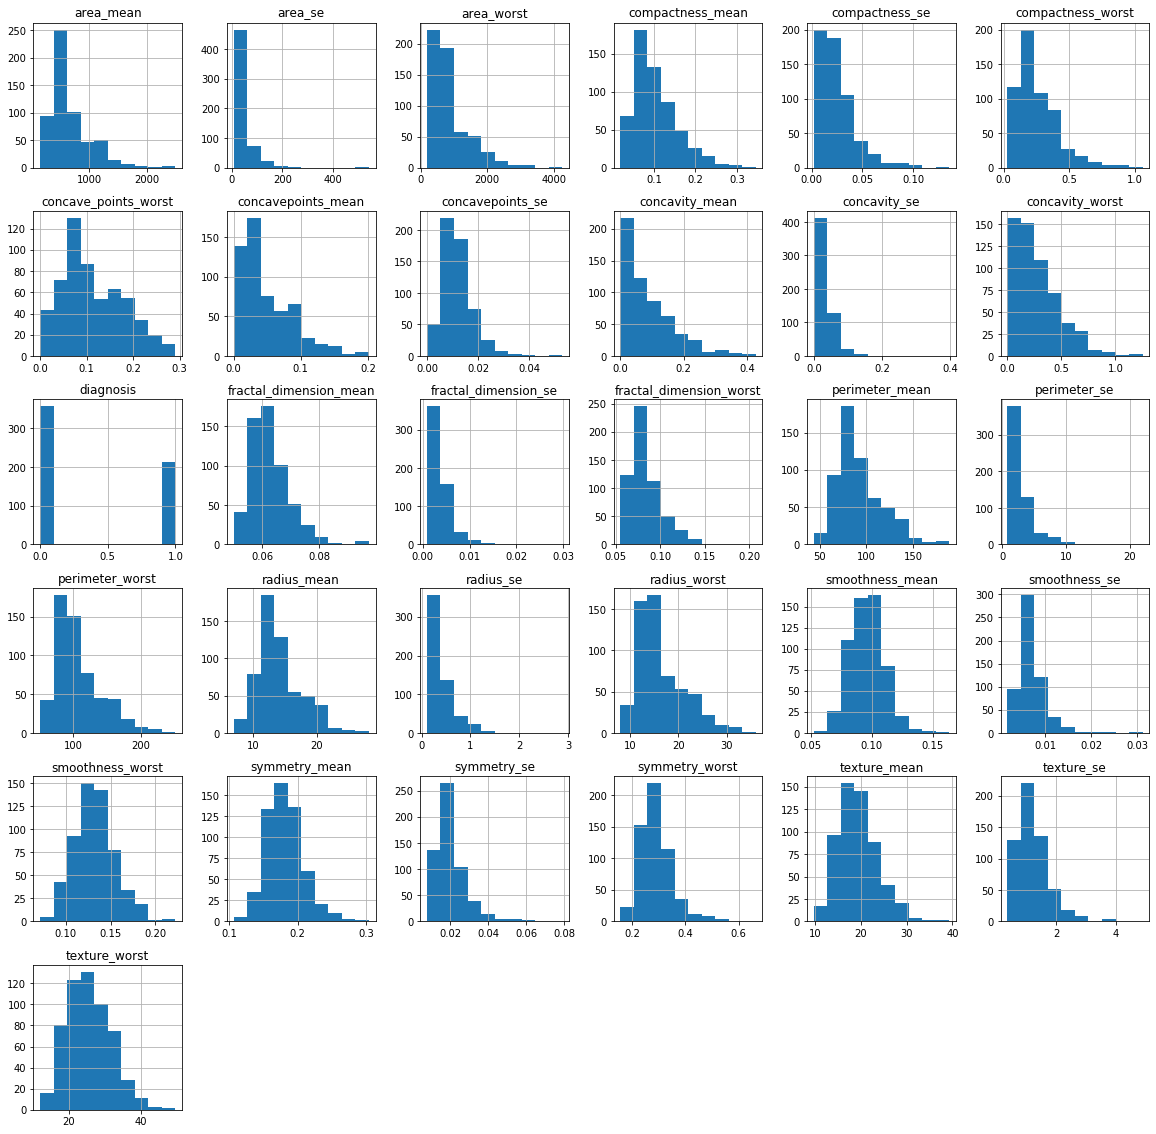

In [9]:
# Гистограммы переменных
df.hist(figsize=(20, 20));

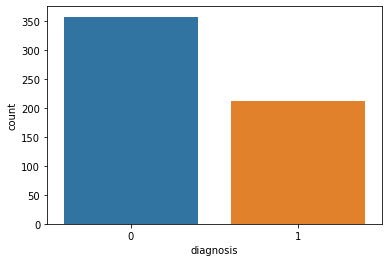

In [10]:
# Баланс целевой переменной
sns.countplot(x='diagnosis',data=df);

In [11]:
# Процедура для получения списка сильноскореллированных полей
def highly_correlated(corr, value):
    corr_fields = []
    for i in corr:
        for j in corr.index[corr[i] >= value]:
            if i != j and j not in corr_fields and i not in corr_fields:
                corr_fields.append(j)
    return corr_fields

In [12]:
# Рассчитаем корреляции между признаками
corr = df.corr()

# Удалим из датасета сильноскоррелированные признаки (>= 0.85)
df.drop(columns=highly_correlated(corr, 0.85), axis=1, inplace=True)

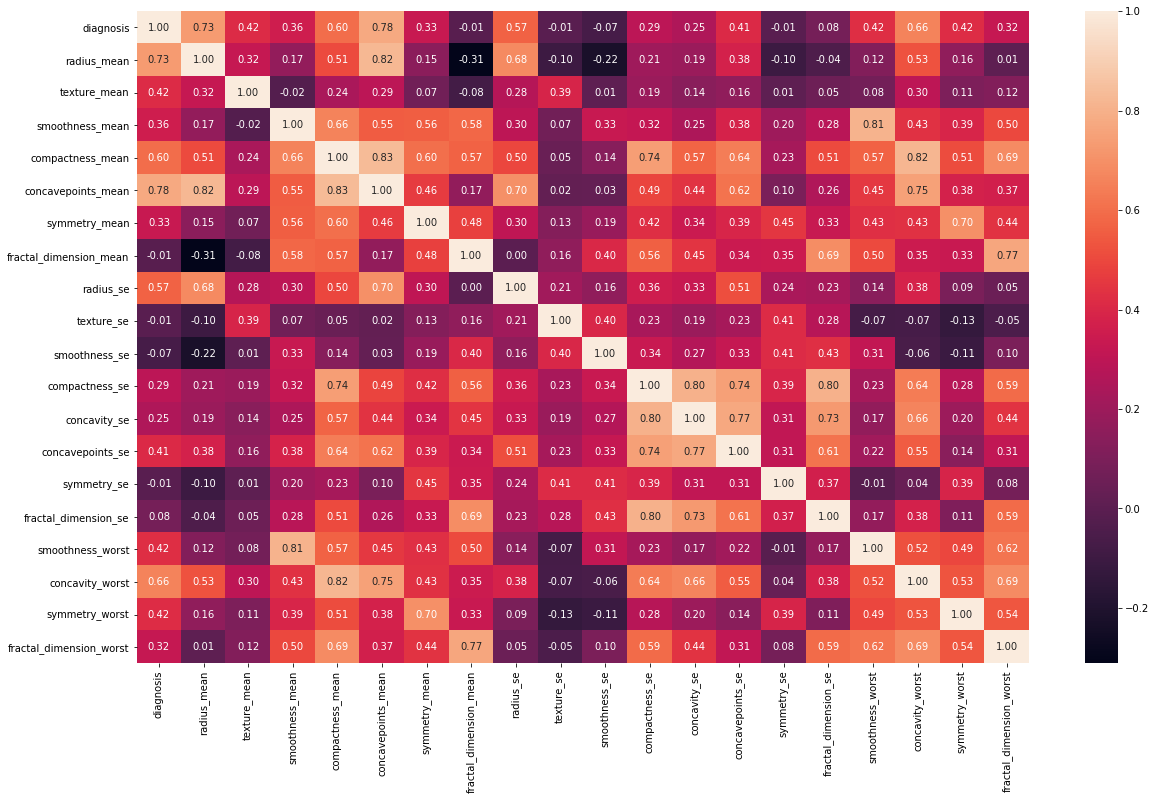

In [13]:
# Обновим корреляции между признаками с учетом изменений
corr = df.corr()

# Выведем тепловую карту для корреляций
plt.figure(figsize=(20,12));
sns.heatmap(corr, annot=True, fmt='.2f');

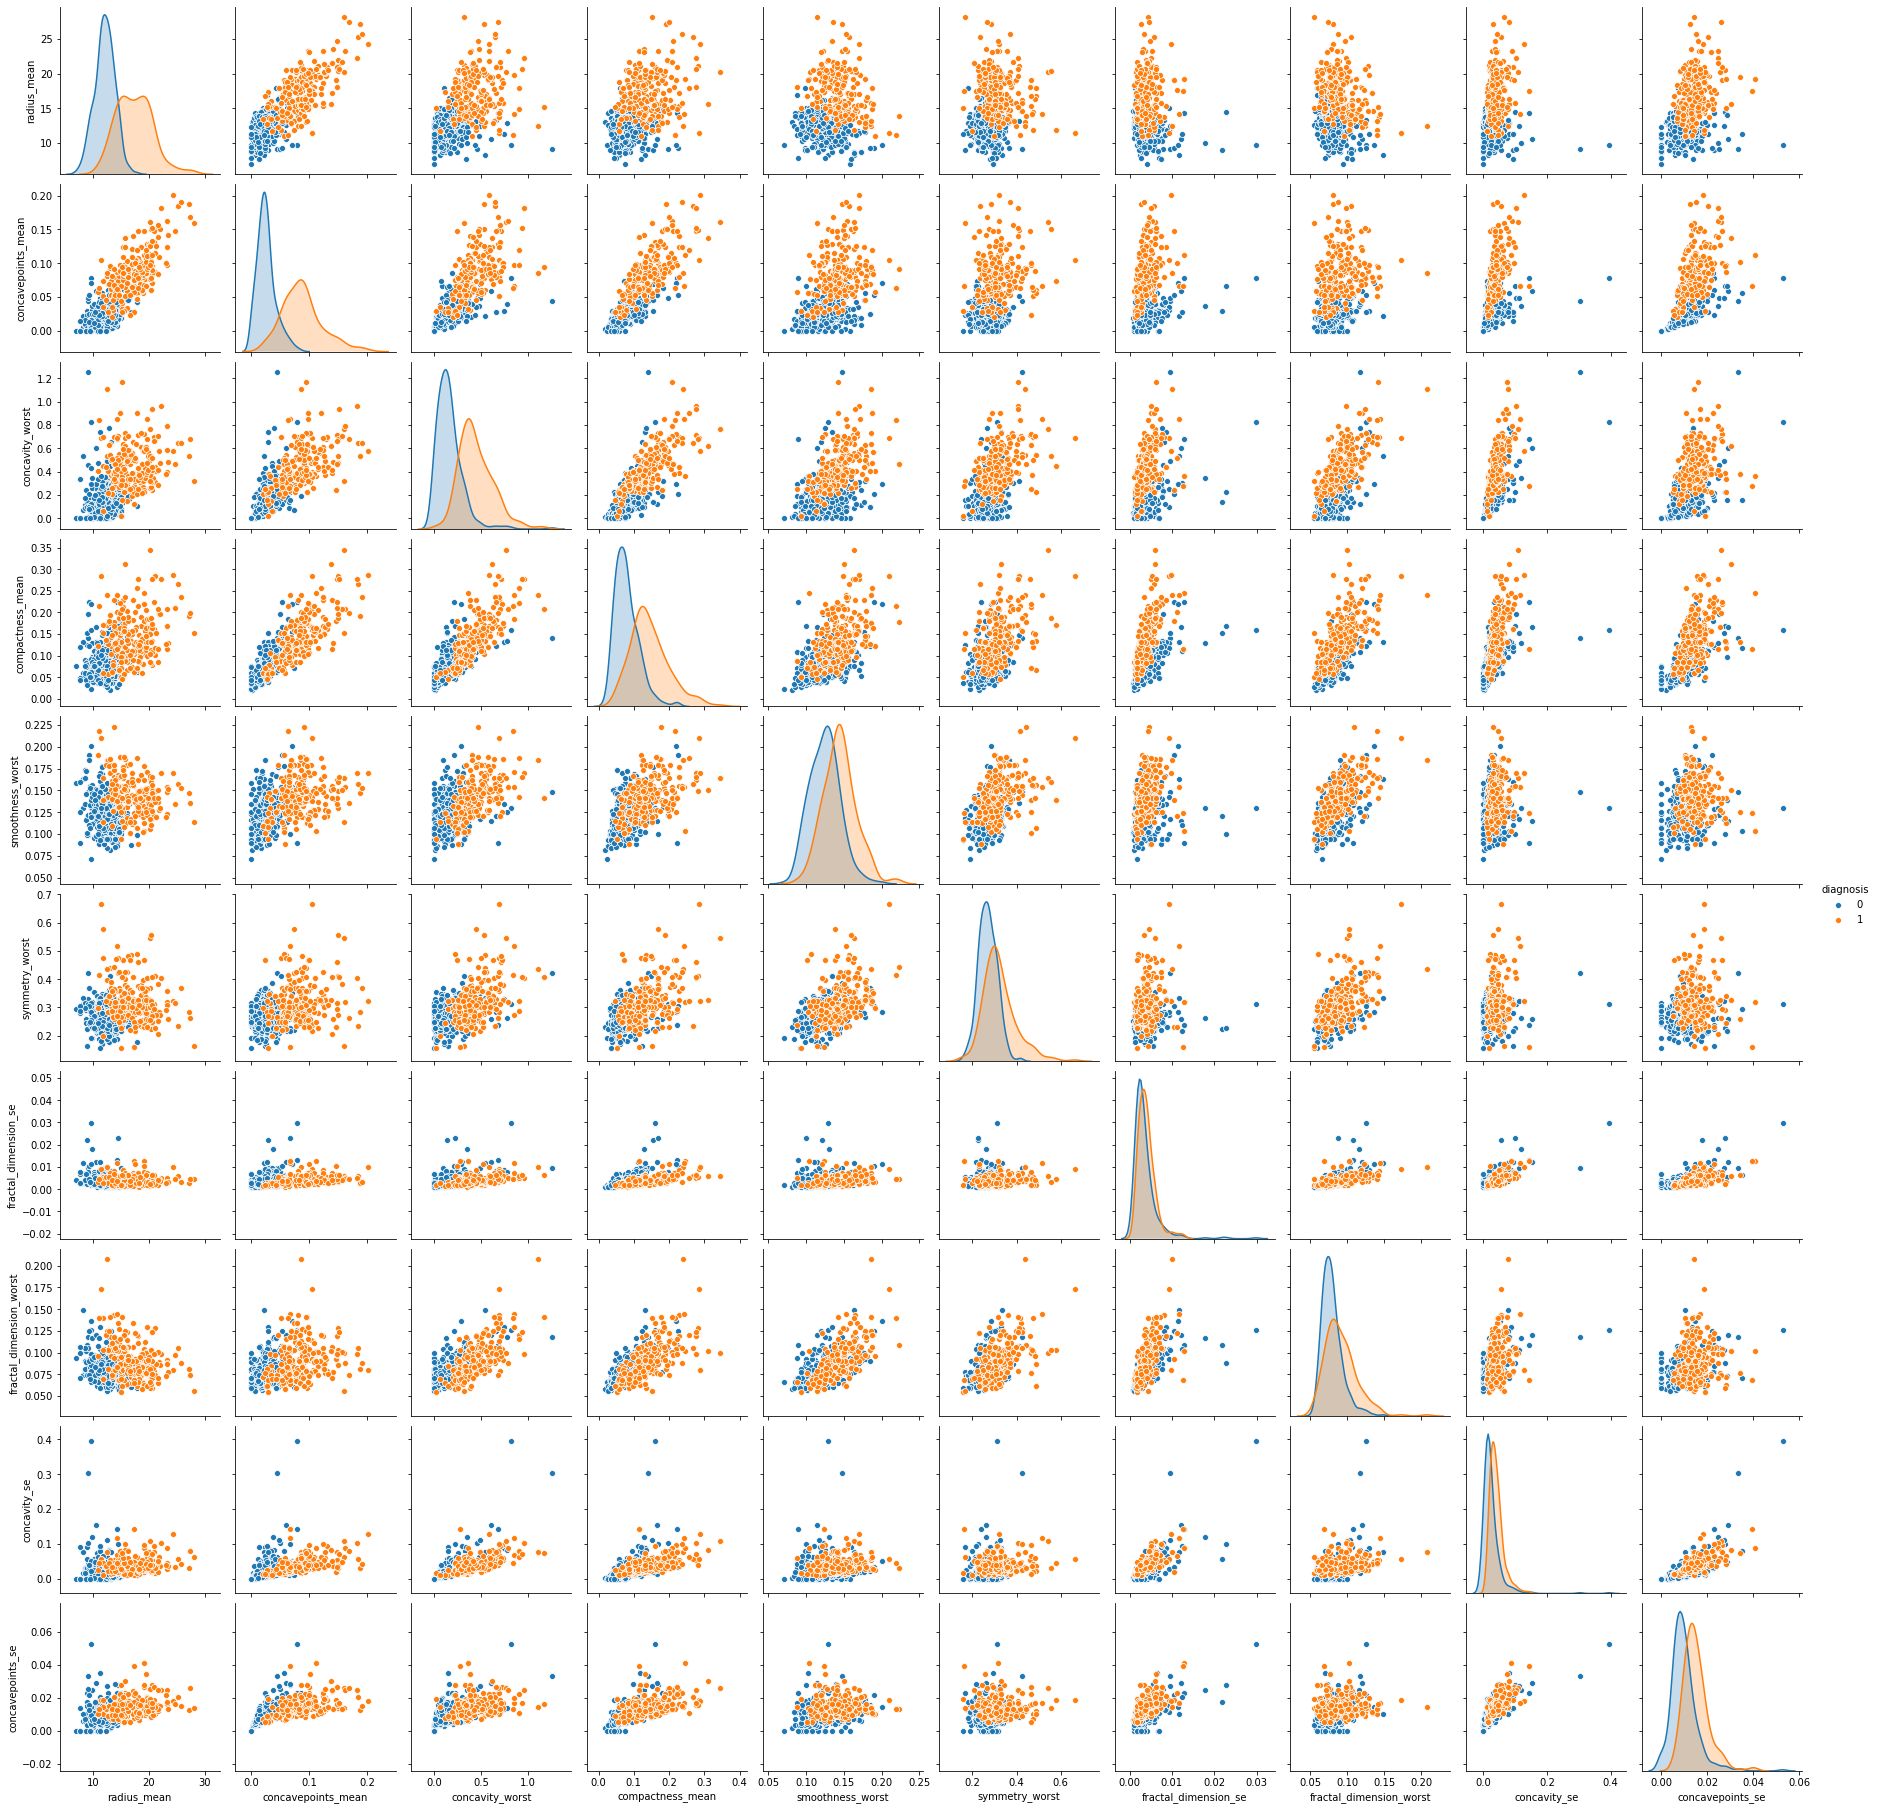

In [14]:
# Построим графики парных корреляций
col_list = highly_correlated(corr, 0.6)
col_list.append('diagnosis')

sns.pairplot(data=df[col_list], hue='diagnosis');

<a id="4"></a>
## Создание сетов для ML [(Наверх)](#0) 

In [15]:
# Импортируем библиотеки для ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [16]:
# Процедура оценки качества
def quality_report(prediction, actual):
    output = dict(
        accuracy=accuracy_score(prediction, actual), 
        precision=precision_score(prediction, actual), 
        recall=recall_score(prediction, actual), 
        f1_score=f1_score(prediction, actual))
    
    return output

In [17]:
# Процедура ROC
def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(y_test, prob_prediction)
    auc_score = roc_auc_score(y_test, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

In [18]:
# Сформируем выборки обучающих и тестовых данных (70:30)
X_train, X_test, y_train, y_test = train_test_split(df.drop(['diagnosis'], axis=1), df['diagnosis'], 
    test_size=0.30, random_state=42, stratify=df['diagnosis'])

# Cтандартизируем переменные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a id="5"></a>
## LogisticRegression [(Наверх)](#0) 

In [19]:
log_reg = LogisticRegression().fit(X_train_scaled, y_train)

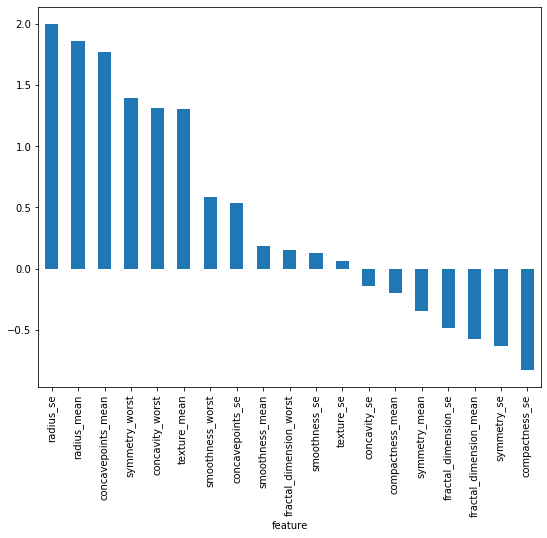

In [20]:
# Сформируем диаграмму влияния коэффициентов на целевую переменную
featureImportance = pd.DataFrame({"feature": df.drop('diagnosis',axis=1).columns, 
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(9, 7));

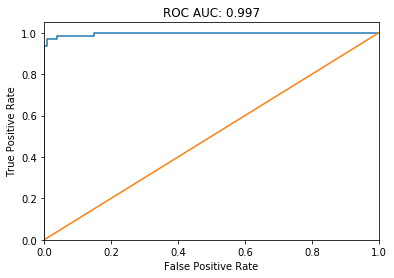

In [21]:
# Построим ROC
plot_roc_curve(log_reg.predict_proba(X_test_scaled)[:,1], y_test)

<a id="6"></a>
## LogisticRegressionCV [(Наверх)](#0) 

In [22]:
log_reg_cv = LogisticRegressionCV(cv=5, random_state=42).fit(X_train_scaled, y_train)

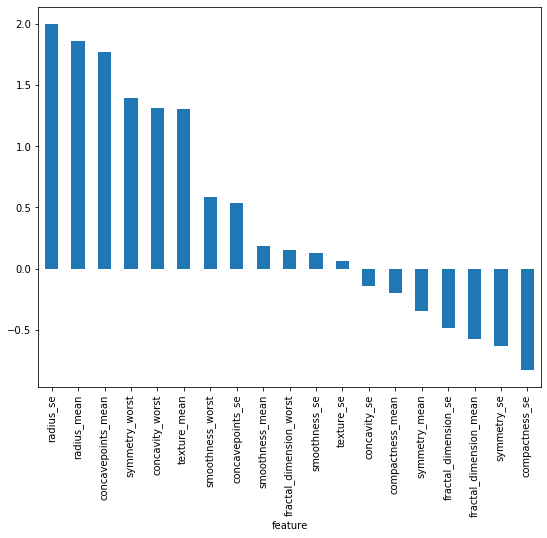

In [23]:
# Сформируем диаграмму влияния коэффициентов на целевую переменную
featureImportance = pd.DataFrame({"feature": df.drop('diagnosis',axis=1).columns, 
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(9, 7));

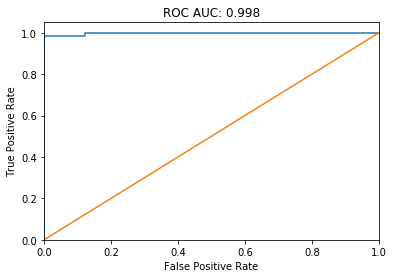

In [24]:
# Построим ROC
plot_roc_curve(log_reg_cv.predict_proba(X_test_scaled)[:,1], y_test)

<a id="7"></a>
## BONUS. Модель KNN с настройкой числа соседей на CV [(Наверх)](#0) 

In [25]:
# Получим модель KNN "из коробки" со стандартными настройками
knn = KNeighborsClassifier(n_neighbors=40).fit(X_train_scaled, y_train)

In [26]:
# Процедура для выбора оптимального набора параметров, используя поиск по сетке (GridSearchCV)
def grid_cv(set_X, set_y, estimator, parameters):
    gcv = GridSearchCV(estimator=estimator, param_grid=parameters,
                       scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    gcv.fit(set_X, set_y)
    
    return dict(best_parameters=gcv.best_params_, best_score=gcv.best_score_)

In [27]:
# Выберем оптимальные параметры для KNN
parameters = {'n_neighbors':range(5, 45), 'weights':['uniform', 'distance']}
bp = grid_cv(X_train_scaled, y_train, KNeighborsClassifier(), parameters)['best_parameters']

In [28]:
# Получим модель KNN с оптимальными настройками
knn_cv = KNeighborsClassifier(n_neighbors=bp['n_neighbors'], weights=bp['weights']).fit(X_train_scaled, y_train)

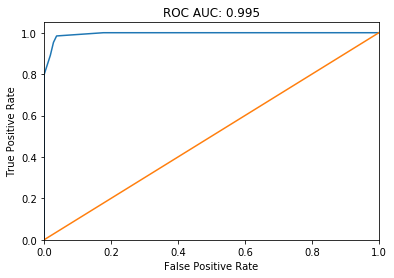

In [29]:
# Построим ROC
plot_roc_curve(knn_cv.predict_proba(X_test_scaled)[:,1], y_test)

<a id="8"></a>
## Результат [(Наверх)](#0) 

In [30]:
# Создадим словарь обработки результатов
summary_dict = dict(LogReg=log_reg, LogRegCV=log_reg_cv, KNN_Base=knn, KNN_CV=knn_cv)

In [31]:
summary_df = pd.DataFrame()

for key, value in summary_dict.items():
    summary_df = summary_df.join(pd.DataFrame.from_dict(data=quality_report(value.predict(X_train_scaled), y_train), 
                                                          columns=[f'{key} (train)'], orient='index'), how='right')
    summary_df = summary_df.join(pd.DataFrame.from_dict(data=quality_report(value.predict(X_test_scaled), y_test), 
                                                          columns=[f'{key} (test)'], orient='index'), how='right')

In [32]:
summary_df

,LogReg (train),LogReg (test),LogRegCV (train),LogRegCV (test),KNN_Base (train),KNN_Base (test),KNN_CV (train),KNN_CV (test)
accuracy,0.987437,0.976608,0.987437,0.982456,0.929648,0.935673,0.969849,0.947368
precision,0.966216,0.937500,0.966216,0.953125,0.837838,0.843750,0.925676,0.890625
recall,1.000000,1.000000,1.000000,1.000000,0.968750,0.981818,0.992754,0.966102
f1_score,0.982818,0.967742,0.982818,0.976000,0.898551,0.907563,0.958042,0.926829
